## Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import nsimplify

## Part A

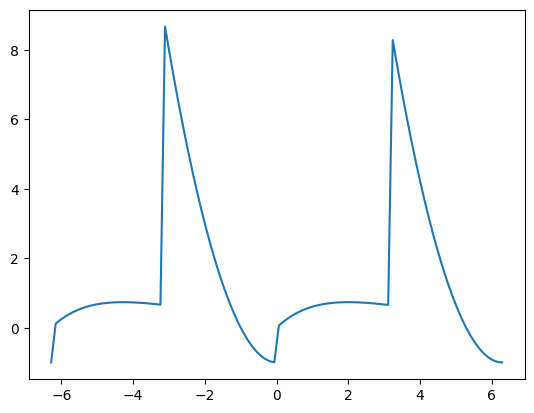

In [2]:
# Defining the Domain
x_vals = np.linspace(-2*np.pi, 2*np.pi, 100)
period = 2*np.pi

def func(x, b, f):
    y = 0
    if b <= x and 0 >= x:
        y = (x**2) - 1
    elif 0 <= x and f >= x:
        y = x * np.exp((-1/2)*x)
    if b > x:
        x_new = x + period
        y = func(x_new, b, f)
    elif f < x:
        x_new = x - period
        y = func(x_new, b, f)
    return y



y_vals = [func(i, -np.pi, np.pi) for i in x_vals]

plt.plot(x_vals, y_vals)
plt.show()

## Part B

In [3]:
x = sym.symbols('x')
n = sym.symbols('n',integer = 'True', positive = 'True')

fs = np.empty(150, dtype=object)
xrange = np.linspace(2*np.pi,-2*np.pi,100)
y = np.zeros([150,100])

# Defining the two parts of the step function
eq1 = (x**2) - 1
eq2 = x * (sym.exp(-0.5*x))

$$Evaluating \ a_0$$

$$a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \,dx$$
$$a_0 = \frac{1}{\pi} \left( \int_{-\pi}^{0} (x^2 - 1) \,dx + \int_{0}^{\pi} x e^{-\frac{x}{2}} \,dx \right)$$

In [4]:
a0 = (1/(sym.pi)) * (eq1.integrate((x, -sym.pi, 0)) + eq2.integrate((x, 0, sym.pi)))
a0

(-pi + 1.0*(-2.0*pi - 4.0)*exp(-0.5*pi) + 4.0 + pi**3/3)/pi

$$Evaluating \ a_n$$

$$a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(n x) \,dx$$
$$a_n = \frac{1}{\pi} \left( \int_{-\pi}^{0} (x^2 - 1) \cos(n x) \,dx + \int_{0}^{\pi} (x e^{-\frac{x}{2}}) \cos(n x) \,dx \right)$$

In [5]:
an = (1/sym.pi) * (sym.integrate((eq1 * sym.cos(n * x)), (x, -sym.pi, 0)) + sym.integrate((eq2 * sym.cos(n * x)), (x, 0, sym.pi)))
an
nsimplify(an)

(-(-1)**n*pi*n**2/(1024*(n**4*exp(pi/2)/512 + n**2*exp(pi/2)/1024 + exp(pi/2)/8192)) + (-1)**n*n**2/(512*(n**4*exp(pi/2)/512 + n**2*exp(pi/2)/1024 + exp(pi/2)/8192)) - (-1)**n*pi/(4096*(n**4*exp(pi/2)/512 + n**2*exp(pi/2)/1024 + exp(pi/2)/8192)) - (-1)**n/(2048*(n**4*exp(pi/2)/512 + n**2*exp(pi/2)/1024 + exp(pi/2)/8192)) + 2*(-1)**n*pi/n**2 - n**2/(512*(n**4/512 + n**2/1024 + 1/8192)) + 1/(2048*(n**4/512 + n**2/1024 + 1/8192)))/pi

$$Evaluating \ b_n$$

$$b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(n x) \,dx$$
$$b_n = \frac{1}{\pi} \left( \int_{-\pi}^{0} (x^2 - 1) \sin(n x) \,dx + \int_{0}^{\pi} (x e^{-\frac{x}{2}}) \sin(n x) \,dx \right)$$

In [6]:
bn = (1/sym.pi) * (sym.integrate((eq1 * sym.sin(n * x)), (x, -sym.pi, 0)) + sym.integrate((eq2 * sym.sin(n * x)), (x, 0, sym.pi)))
bn
nsimplify(bn)

(-(-1)**n*pi*n**3/(32*(n**4*exp(pi/2)/32 + n**2*exp(pi/2)/64 + exp(pi/2)/512)) - (-1)**n*n/(32*(n**4*exp(pi/2)/32 + n**2*exp(pi/2)/64 + exp(pi/2)/512)) - (-1)**n*pi*n/(128*(n**4*exp(pi/2)/32 + n**2*exp(pi/2)/64 + exp(pi/2)/512)) - (-1)**n/n + (-1)**n*pi**2/n - 2*(-1)**n/n**3 + n/(32*(n**4/32 + n**2/64 + 1/512)) + 1/n + 2/n**3)/pi

In [7]:
# Printing the Fourier Series
fs[0] = a0/2

f = sym.lambdify(x,fs[0],'numpy')
y[0,:] = f(xrange)

# Writing the fourier series upto 6 terms (upto n = 5)
for i in range (1,6):
    fs[i] = fs[i-1]+ an.subs(n,i)*sym.cos(i*x) + bn.subs(n,i)*sym.sin(i*x)
    print(i,".",fs[i])
    f = sym.lambdify(x,fs[i],'numpy')
    y[i,:]=f(xrange)

fs[i]

1 . (-pi**2 + 0.64*exp(-0.5*pi) + 0.8*pi*exp(-0.5*pi) + 6.64)*sin(x)/pi + (-2*pi - 0.48 - 0.48*exp(-0.5*pi) + 0.4*pi*exp(-0.5*pi))*cos(x)/pi + (-pi + 1.0*(-2.0*pi - 4.0)*exp(-0.5*pi) + 4.0 + pi**3/3)/(2*pi)
2 . (-pi**2 + 0.64*exp(-0.5*pi) + 0.8*pi*exp(-0.5*pi) + 6.64)*sin(x)/pi + (-0.470588235294118*pi*exp(-0.5*pi) - 0.110726643598616*exp(-0.5*pi) + 0.110726643598616 + pi**2/2)*sin(2*x)/pi + (-2*pi - 0.48 - 0.48*exp(-0.5*pi) + 0.4*pi*exp(-0.5*pi))*cos(x)/pi + (-0.207612456747405 - 0.117647058823529*pi*exp(-0.5*pi) + 0.207612456747405*exp(-0.5*pi) + pi/2)*cos(2*x)/pi + (-pi + 1.0*(-2.0*pi - 4.0)*exp(-0.5*pi) + 4.0 + pi**3/3)/(2*pi)
3 . (-pi**2 + 0.64*exp(-0.5*pi) + 0.8*pi*exp(-0.5*pi) + 6.64)*sin(x)/pi + (-0.470588235294118*pi*exp(-0.5*pi) - 0.110726643598616*exp(-0.5*pi) + 0.110726643598616 + pi**2/2)*sin(2*x)/pi + (-pi**2/3 + 0.0350620891161432*exp(-0.5*pi) + 0.324324324324324*pi*exp(-0.5*pi) + 0.849876903930958)*sin(3*x)/pi + (-2*pi - 0.48 - 0.48*exp(-0.5*pi) + 0.4*pi*exp(-0.5*pi))*c

(-pi**2 + 0.64*exp(-0.5*pi) + 0.8*pi*exp(-0.5*pi) + 6.64)*sin(x)/pi + (-0.470588235294118*pi*exp(-0.5*pi) - 0.110726643598616*exp(-0.5*pi) + 0.110726643598616 + pi**2/2)*sin(2*x)/pi + (-pi**2/3 + 0.0350620891161432*exp(-0.5*pi) + 0.324324324324324*pi*exp(-0.5*pi) + 0.849876903930958)*sin(3*x)/pi + (-0.246153846153846*pi*exp(-0.5*pi) - 0.0151479289940828*exp(-0.5*pi) + 0.0151479289940828 + pi**2/4)*sin(4*x)/pi + (-pi**2/5 + 0.00784236839525537*exp(-0.5*pi) + 0.198019801980198*pi*exp(-0.5*pi) + 0.439842368395255)*sin(5*x)/pi + (-2*pi - 0.48 - 0.48*exp(-0.5*pi) + 0.4*pi*exp(-0.5*pi))*cos(x)/pi + (-0.207612456747405 - 0.117647058823529*pi*exp(-0.5*pi) + 0.207612456747405*exp(-0.5*pi) + pi/2)*cos(2*x)/pi + (-2*pi/9 - 0.102264426588751 - 0.102264426588751*exp(-0.5*pi) + 0.0540540540540541*pi*exp(-0.5*pi))*cos(3*x)/pi + (-0.0596449704142012 - 0.0307692307692308*pi*exp(-0.5*pi) + 0.0596449704142012*exp(-0.5*pi) + pi/8)*cos(4*x)/pi + (-2*pi/25 - 0.0388197235565141 - 0.0388197235565141*exp(-0.5*

## Part C

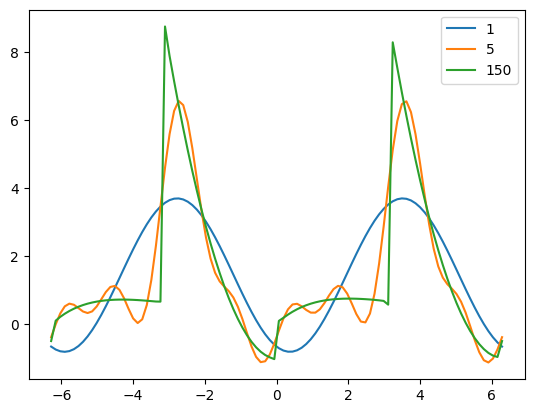

In [8]:
fs[0] = a0/2

# Converting to Numpy functions
f1 = sym.lambdify(x, fs[0], 'numpy')
y[0, :] = f1(xrange)

# Substituting the n = 1, 2, 3,........ values to a(n) and b(n)
for m in range(1, 150):
    fs[m] = fs[m - 1] + an.subs(n, m) * sym.cos(m * x) + bn.subs(n, m) * sym.sin(m * x)
    f1 = sym.lambdify(x, fs[m], 'numpy')

    y[m, :] = f1(xrange)


plt.plot(xrange, y[1, :])
plt.plot(xrange, y[4, :])
plt.plot(xrange, y[149, :])


plt.legend(["1", "5", "150"])
plt.show()

## Part D

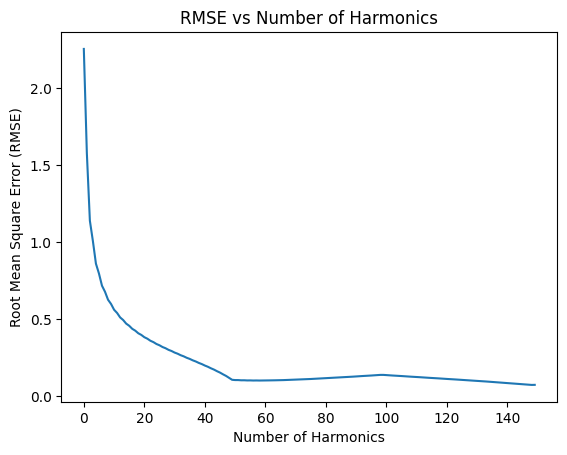

**Root Mean Square Error for 1st harmonic:** 2.2567854636925704


**Root Mean Square Error for 5th harmonic:** 0.8608080776001575


**Root Mean Square Error for 150th harmonic:** 0.07310069585902551


In [16]:
from sklearn.metrics import mean_squared_error
from IPython.display import Markdown

# Define the true function values over the domain [-4*pi, 4*pi]
true_values = [func(i, -np.pi, np.pi) for i in xrange]

# Function to calculate RMSE
def calculate_rmse(predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    return rmse

# Calculate RMSE for the 0th to 150th harmonics
rmse_values = []
for m in range(0, 150):
    predicted_values = y[m, :]
    rmse = calculate_rmse(predicted_values)
    rmse_values.append(rmse)

# Plot the RMSE values
plt.plot(range(0, 150), rmse_values)
plt.xlabel('Number of Harmonics')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE vs Number of Harmonics')
plt.show()

# Display the numeric answers
rmse_1st_harmonic = rmse_values[0]
rmse_5th_harmonic = rmse_values[4]
rmse_150th_harmonic = rmse_values[149]

display(Markdown(f"**Root Mean Square Error for 1st harmonic:** {rmse_1st_harmonic}\n"))
display(Markdown(f"**Root Mean Square Error for 5th harmonic:** {rmse_5th_harmonic}\n"))
display(Markdown(f"**Root Mean Square Error for 150th harmonic:** {rmse_150th_harmonic}\n"))
